In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./train.csv')
df['Sex'].replace(['female' , 'male'] , [0 ,1] ,inplace=True)
df['Embarked'].replace(['S' ,'C' ,'Q'] , [0 , 1 , 2] ,inplace=True)
df.pop('Name')
df.pop('Ticket')
df.pop('Cabin')
df.describe()
#df.pop('PassengerId')
#print(df['Cabin'].unique())
#df.pop('Age')
#df = df[np.isfinite(df['Embarked'])]
#df.dropna() 
#df.head()
#print(df[2:])
#print(df.describe())

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Unknown data to be predicted below
 :- by training data on other columns and predicting those rows which don't have the data yet

In [4]:
copyDf = df.copy()
copyDf = copyDf[np.isfinite(copyDf['Age'])]
copyDf = copyDf[np.isfinite(copyDf['Fare'])]
copyDf = copyDf[np.isfinite(copyDf['Embarked'])]
print(len(copyDf))

712


In [5]:
from sklearn import linear_model
#preparing target
def abc( a , b , c , df , copyDf , flag ):
    inds = np.where(np.isnan(df[a]))
    target = copyDf.pop(a)

    #preparing data to be predicted
    testSet = df.copy()
    testSet.pop(a)
    testSet = testSet[np.isfinite(testSet[b])]
    testSet = testSet[np.isfinite(testSet[c])]

    #using model
    reg = linear_model.Ridge (alpha = .5)
    reg.fit(copyDf , target)
    #print(reg.predict(testSet))

    results = reg.predict(testSet)
    print(type(results))
    j=0
    if flag == 'selected':
        for i in inds:
            #print(df['Age'][i] + " = " + results[i])
            df[a][i] = results[i]
    elif flag == 'all':
        for i in range(0, len(df)):
            if(i+j < len(df) and np.isfinite(df[b][i+j]) and np.isfinite(df[c][i+j])):
                df[a][i+j] = results[i]
            else:
                j+=1
    return len(testSet)
print(abc('Age' , 'Fare' , 'Embarked' , df , copyDf.copy() , 'selected'))
print(abc('Fare' , 'Age' , 'Embarked' , df , copyDf.copy() , 'selected'))
#print(abc('Embarked' , 'Age' , 'Fare' , df , copyDf.copy() , 'selected'))

<type 'numpy.ndarray'>
889
<type 'numpy.ndarray'>
889


/home/rishabh/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
col_mean = np.nanmean(df, axis=0)
#inds = np.where(np.isnan(df['Age']))

#for column in ['Fare', 'Embarked']:
#    df[column].fillna(df[column].mode()[0], inplace=True)
#    print(df[column].mode()[0])
#print(inds)
#df['Age'][inds[0]] = col_mean[3]
#inds = np.where(np.isnan(df['Fare']))
#df['Fare'][inds[0]] = col_mean[6]
inds = np.where(np.isnan(df['Embarked']))
df['Embarked'][inds[0]] = 0

/home/rishabh/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.633069,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.444130,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,-5.280469,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,21.893776,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [8]:
#df['Embarked'].isnull().values.any()
print(df['Embarked'].unique())
print(df['Fare'].unique())

[0. 1. 2.]
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.8     76.7292  61.9792  27.75    46.9     80.      83.475
  27.9     15.2458   8.1583   8.6625  73.5     14.4542  56.4958   7.65
  29.      12.475    9.       9.5      7.7875  47.1     15.85    34.375
  61.175   20.575   34.6542  63.3583  23.      77.2875   8.6542   7.775
  24.15     9.825   14.4583 247.5208   7.1417  22.3583   6.975    7.05
  14.5     15.0458  26.2833   9.2167  79.2      6.75    11.5     36.75
   7.7958  12.525   66.6      7.3125  61.3792   7.7333  69.55    16.1
  15.75    20.525   55.      25.925   33.5     30.6958  25.4667  28.7125
   0.      15.05    39.      22.025   50.       8.4042   6.4958  

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(7, 7), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe875ddab90>,
      dtype=object)

In [10]:
target = df.pop('Survived')
target.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [11]:
print(target.head())
print(df.head())
scatter_matrix(df, alpha=0.2, figsize=(7, 7), diagonal='kde')

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1       3    1  22.0      1      0   7.2500       0.0
1            2       1    0  38.0      1      0  71.2833       1.0
2            3       3    0  26.0      0      0   7.9250       0.0
3            4       1    0  35.0      1      0  53.1000       0.0
4            5       3    1  35.0      0      0   8.0500       0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe86f7b6c90>,
      dtype=object)

In [12]:
print(type(target))
print(type(df))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


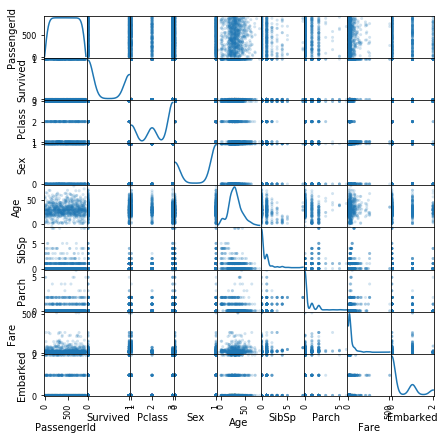

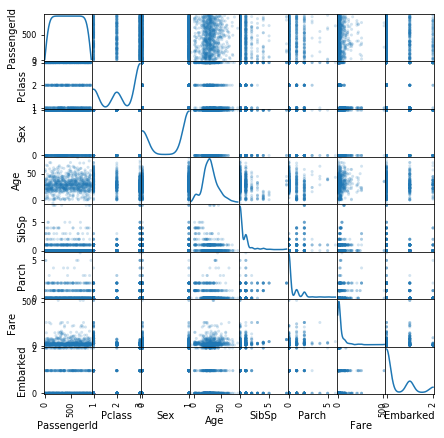

In [13]:
import matplotlib.pyplot as plt
#df['PassengerId'].plot()
plt.show()

In [14]:
output=pd.DataFrame()
test = pd.read_csv('./test.csv')
test.pop('Name')
#output['PassengerId'] = test.pop('PassengerId')
output['PassengerId'] = test['PassengerId']
test.pop('Ticket')
test.pop('Cabin')
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
test['Sex'].replace(['female' , 'male'] , [0 ,1] ,inplace=True)
test['Embarked'].replace(['S' ,'C' ,'Q'] , [0 , 1 , 2] ,inplace=True)
abDf = test.copy()
abDf = abDf[np.isfinite(abDf['Age'])]
abDf = abDf[np.isfinite(abDf['Embarked'])]
abDf = abDf[np.isfinite(abDf['Fare'])]
col_mean = np.nanmean(test, axis=0)
print(abc('Age' , 'Fare' , 'Embarked' , test , abDf.copy() , 'all'))
#print(test)
inds = np.where(np.isnan(test['Age']))
#print(inds)
test['Age'][inds[0]] = col_mean[2]
inds = np.where(np.isnan(test['Fare']))
test['Fare'][inds[0]] = col_mean[5]

<type 'numpy.ndarray'>


/home/rishabh/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


417


/home/rishabh/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/rishabh/.conda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
#print(test)
test.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.636364,29.422301,0.447368,0.392344,35.542895,0.464115
std,120.810458,0.841838,0.481622,7.423662,0.896760,0.981429,55.867088,0.685516
min,892.000000,1.000000,0.000000,12.362317,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,23.839236,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,1.000000,26.502582,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,1.000000,36.053728,1.000000,0.000000,31.471875,1.000000
max,1309.000000,3.000000,1.000000,60.500000,8.000000,9.000000,512.329200,2.000000


In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
#df=df.values
clf = clf.fit(df, target)
output['Survived'] = clf.predict(test)
output = pd.DataFrame(output)
output.to_csv('./tree.csv' , index=False)

In [18]:
#pd.to_csv('./submit.csv')
#submit = []
#pd.DataFrame.join(test['PassengerId'].toFrame() , output , left_on='PassengerId', right_on = 'Survived')
#type(output)

#output['PassengerId'] = test['PassengerId']
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [19]:
output.describe()

,PassengerId,Survived
count,418.000000,418.00000
mean,1100.500000,0.27512
std,120.810458,0.44711
min,892.000000,0.00000
25%,996.250000,0.00000
50%,1100.500000,0.00000
75%,1204.750000,1.00000
max,1309.000000,1.00000


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logModel = LogisticRegression(random_state=10)
logModel= logModel.fit(df, target)
scores = cross_val_score(logModel, df, target, cv=5)
print(scores)
output['Survived'] = logModel.predict(test)
output.to_csv('./logisticModel.csv' , index=False)

[0.79329609 0.80446927 0.78089888 0.76966292 0.80225989]


In [21]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import cross_val_score
naiveModel = GaussianNB()
naiveModel.fit(df , target)
#logModel= logModel.fit(df, target)
scores = cross_val_score(naiveModel, df, target, cv=5)
print(scores)
output['Survived'] = naiveModel.predict(test)
output.to_csv('./naiveModel.csv' , index=False)

[0.78212291 0.7877095  0.79775281 0.78651685 0.80225989]


In [23]:
from sklearn.svm import SVC
svmModel = SVC(random_state=10 , kernel='linear')
svmModel.fit(df , target)
scores = cross_val_score(svmModel , df, target , cv=5)
print(scores)
output['Survived'] = svmModel.predict(test)
output.to_csv('./svmModel.csv' , index=False)

[0.79888268 0.81005587 0.78651685 0.75280899 0.78531073]


In [25]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(90, 2), random_state=10)
NN.fit(df , target)
scores = cross_val_score(naiveModel, df, target, cv=5)
print(scores)
output['Survived'] = NN.predict(test)
output.to_csv('./NN.csv' , index=False)

[0.78212291 0.7877095  0.79775281 0.78651685 0.80225989]


In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=55, algorithm='ball_tree')
KNN.fit(df , target)
scores = cross_val_score(KNN, df, target, cv=5)
print(scores)
output['Survived'] = KNN.predict(test)
output.to_csv('./KNN.csv' , index=False)

[0.60893855 0.6424581  0.66853933 0.64044944 0.63276836]


In [39]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(df)
print(sel)

VarianceThreshold(threshold=0.16)


In [31]:
KNN.fit(sel , target)
scores = cross_val_score(KNN, df, target, cv=5)
print(scores)
output['Survived'] = KNN.predict(test)
output.to_csv('./KNN.csv' , index=False)

TypeError: float() argument must be a string or a number

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df.shape
X_new = SelectKBest(chi2, k=2).fit_transform(df, target)
X_new.shape
(150, 2)


ValueError: Input X must be non-negative.